#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Reading Data

In [2]:
df= pd.read_csv("MoviesOnStreamingPlatforms.csv", encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


#### Data Cleaning and Preprocessing

In [4]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [5]:
Netflix = df[df["Netflix"] == 1]
Hulu = df[df["Hulu"] == 1]
Prime_Video = df[df["Prime Video"] == 1]
Disney = df[df["Disney+"] == 1]

In [6]:
Netflix["Platform"] = "Netflix"
Hulu["Platform"] = "Hulu"
Prime_Video["Platform"] = "Prime_Video"
Disney["Platform"] = "Disney"

In [7]:
Platforms_data = pd.concat([Netflix,Hulu,Disney,Prime_Video],sort=True)

In [8]:
Platforms_data

,Age,Country,Directors,Disney+,Genres,Hulu,ID,IMDb,Language,Netflix,Platform,Prime Video,Rotten Tomatoes,Runtime,Title,Type,Unnamed: 0,Year
0,13+,"United States,United Kingdom",Christopher Nolan,0,"Action,Adventure,Sci-Fi,Thriller",0,1,8.8,"English,Japanese,French",1,Netflix,0,87%,148.0,Inception,0,0,2010
1,18+,United States,"Lana Wachowski,Lilly Wachowski",0,"Action,Sci-Fi",0,2,8.7,English,1,Netflix,0,87%,136.0,The Matrix,0,1,1999
2,13+,United States,"Anthony Russo,Joe Russo",0,"Action,Adventure,Sci-Fi",0,3,8.5,English,1,Netflix,0,84%,149.0,Avengers: Infinity War,0,2,2018
3,7+,United States,Robert Zemeckis,0,"Adventure,Comedy,Sci-Fi",0,4,8.5,English,1,Netflix,0,96%,116.0,Back to the Future,0,3,1985
4,18+,"Italy,Spain,West Germany",Sergio Leone,0,Western,0,5,8.8,Italian,1,Netflix,1,97%,161.0,"The Good, the Bad and the Ugly",0,4,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16207,NaN,NaN,NaN,0,NaN,0,16208,NaN,NaN,0,Prime_Video,1,NaN,NaN,Japanese WWII Firearms,0,16207,2018
16208,NaN,NaN,NaN,0,NaN,0,16209,NaN,NaN,0,Prime_Video,1,NaN,NaN,Cracking the Prophetic Code,0,16208,2000
16209,NaN,NaN,NaN,0,NaN,0,16210,NaN,NaN,0,Prime_Video,1,NaN,51.0,Behind the Race to the Moon,0,16209,2002
16210,NaN,NaN,NaN,0,"Documentary,History,War",0,16211,NaN,NaN,0,Prime_Video,1,NaN,45.0,Late War Fighters of the Luftwaffe,0,16210,1997


In [9]:
data = Platforms_data[['Platform','Title','Genres','IMDb','Rotten Tomatoes','Year','Language','Country','Age','Directors']]

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

Platform               0
Title                  0
Genres               279
IMDb                 576
Rotten Tomatoes    11895
Year                   0
Language             612
Country              443
Age                 9635
Directors            754
dtype: int64

Directors column has 754 NULL values as the above data includes non-fictional shows. Hence, those records cannot be filled with other values.

Mean: 5.911597738768228 Median: 6.1


<AxesSubplot:xlabel='IMDb', ylabel='Density'>

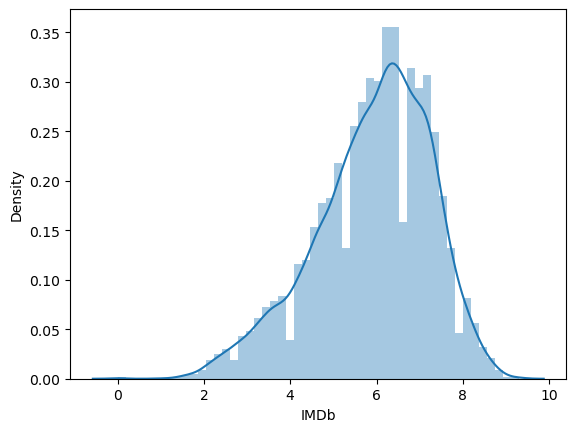

In [12]:
print('Mean:',data['IMDb'].mean(),'Median:',data['IMDb'].median())
sns.distplot(data['IMDb'].dropna())

Above visualization shows that the IMDb column is normally distributed with mean and median almost equal which shows that there are no outliers in the dataset.
Therefore,we are filling the IMDb column with the median value.

In [13]:
data['IMDb'].fillna(data['IMDb'].median(),inplace=True)

In [14]:
data.isnull().sum()

Platform               0
Title                  0
Genres               279
IMDb                   0
Rotten Tomatoes    11895
Year                   0
Language             612
Country              443
Age                 9635
Directors            754
dtype: int64

#Visualizations

#Number of Genres in each platform

In [15]:
Platforms_Data = Platforms_data[["Title","Platform","Genres","Year","Age","Country","Directors","Language","IMDb"]]

In [16]:
Platforms_Data

,Title,Platform,Genres,Year,Age,Country,Directors,Language,IMDb
0,Inception,Netflix,"Action,Adventure,Sci-Fi,Thriller",2010,13+,"United States,United Kingdom",Christopher Nolan,"English,Japanese,French",8.8
1,The Matrix,Netflix,"Action,Sci-Fi",1999,18+,United States,"Lana Wachowski,Lilly Wachowski",English,8.7
2,Avengers: Infinity War,Netflix,"Action,Adventure,Sci-Fi",2018,13+,United States,"Anthony Russo,Joe Russo",English,8.5
3,Back to the Future,Netflix,"Adventure,Comedy,Sci-Fi",1985,7+,United States,Robert Zemeckis,English,8.5
4,"The Good, the Bad and the Ugly",Netflix,Western,1966,18+,"Italy,Spain,West Germany",Sergio Leone,Italian,8.8
...,...,...,...,...,...,...,...,...,...
16207,Japanese WWII Firearms,Prime_Video,NaN,2018,NaN,NaN,NaN,NaN,NaN
16208,Cracking the Prophetic Code,Prime_Video,NaN,2000,NaN,NaN,NaN,NaN,NaN
16209,Behind the Race to the Moon,Prime_Video,NaN,2002,NaN,NaN,NaN,NaN,NaN
16210,Late War Fighters of the Luftwaffe,Prime_Video,"Documentary,History,War",1997,NaN,NaN,NaN,NaN,NaN


number of movies across each platform

## RECOMMENDATION MODEL

#### Feature Selection

In [18]:
feature_Genre = data["Genres"].tolist()

tfidf_Genre = text.TfidfVectorizer(input=feature_Genre, stop_words="english")

tfidf_matrix_Genre = tfidf_Genre.fit_transform(data["Genres"].values.astype('U'))

similarity_Genre = cosine_similarity(tfidf_matrix_Genre)

In [20]:
feature_Country = data["Country"].tolist()

tfidf_Country = text.TfidfVectorizer(input=feature_Country, stop_words="english")

tfidf_matrix_Country = tfidf_Country.fit_transform(data["Country"].values.astype('U'))

similarity_Country = cosine_similarity(tfidf_matrix_Country)

In [21]:
feature_Age = data["Age"].tolist()

tfidf_Age = text.TfidfVectorizer(input=feature_Age, stop_words="english")

tfidf_matrix_Age = tfidf_Age.fit_transform(data["Age"].values.astype('U'))

similarity_Age = cosine_similarity(tfidf_matrix_Age)

In [22]:
feature_directors = data["Directors"].tolist()

tfidf_directors = text.TfidfVectorizer(input=feature_directors, stop_words="english")

tfidf_matrix_directors = tfidf_directors.fit_transform(data["Directors"].values.astype('U'))

similarity_directors = cosine_similarity(tfidf_matrix_directors)

In [23]:
feature_Lang = data["Language"].tolist()

tfidf_Lang = text.TfidfVectorizer(input=feature_Lang, stop_words="english")

tfidf_matrix_Lang = tfidf_Lang.fit_transform(data["Language"].values.astype('U'))

similarity_Lang = cosine_similarity(tfidf_matrix_Lang)

In [24]:
indices = pd.Series(data.index, index=data['Title']).drop_duplicates()

#### Building the model by applying different weights to different features

In [25]:
def movie_recommendation(title):
    

    index = indices[title]
    similarity_scores = list(enumerate(similarity_Lang[index]))
    similarity_scores_Genre = list(similarity_Genre[index])
    similarity_scores_Age = list(similarity_Age[index])
    similarity_scores_Country = list(similarity_Country[index])
    similarity_scores_Directors = list(similarity_directors[index])
    similarity_scores_Lang = pd.DataFrame(similarity_scores,columns = ["Index","Similarity_Score_Lang"])
    similarity_scores_Lang.set_index("Index", inplace = True)
    similarity_scores_Lang["Similarity_Score_Genre"] = similarity_scores_Genre
    similarity_scores_Lang["Similarity_Score_Age"]=similarity_scores_Age
    similarity_scores_Lang["Similarity_Score_Country"]=similarity_scores_Country
    similarity_scores_Lang["Similarity_Score_Directors"]=similarity_scores_Directors
    similarity_scores_Lang["Similarity_Score_Final"] = (similarity_scores_Lang["Similarity_Score_Genre"]*2) + similarity_scores_Lang["Similarity_Score_Lang"]+(similarity_scores_Lang["Similarity_Score_Age"]*0.5)+similarity_scores_Lang["Similarity_Score_Country"]+ (similarity_scores_Lang["Similarity_Score_Directors"])
    
    similarity_scores = similarity_scores_Lang.sort_values("Similarity_Score_Final", ascending = False).head(11)
    movieindices = similarity_scores.index
    Indices = []

    for i in movieindices:
        if i != index:
            Indices.append(i) 
        
    return data[['Platform','Title','IMDb','Country','Age','Language','Directors']].iloc[Indices].sort_values("IMDb", ascending = False)

#### Implementing the model by entering users favourite movie or the movie he watched recently

In [26]:
movie_recommendation("Avatar")

,Platform,Title,IMDb,Country,Age,Language,Directors
7512,Prime_Video,Jack the Giant Killer,6.4,United Kingdom,all,English,Bryan Singer
15555,Prime_Video,City Boy,6.4,"Canada,United Kingdom",NaN,English,John Kent Harrison
7554,Prime_Video,Reaper,5.7,"United States,Canada",NaN,English,NaN
11917,Prime_Video,The Borrowers,5.5,"United Kingdom,United States",NaN,English,Peter Hewitt
11778,Prime_Video,The Gatehouse,4.9,United Kingdom,NaN,English,Martin Gooch
14407,Prime_Video,Chandu on the Magic Island,4.6,United States,NaN,English,Ray Taylor
13607,Prime_Video,The Crown and the Dragon,3.9,United States,NaN,English,Anne K. Black
11471,Prime_Video,Warrioress,2.9,United Kingdom,NaN,English,Ross Boyask
14105,Prime_Video,Prehistoric Women,2.8,United Kingdom,NaN,English,Michael Carreras
13108,Prime_Video,Babes with Blades,2.1,United Kingdom,NaN,English,Cecily Fay
